# DSCI 345 Homework 2: Random variables

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

## 1. Modeling some counts

Consider the following model:
$$\begin{aligned}
N &\sim \text{Poisson}(\lambda) \\
K &\sim \text{Binomial}(N, p) ,
\end{aligned}$$
with $\lambda=20$ and $p=0.1$.
In words, $N$ has a Poisson distribution with mean $\lambda=20$,
and given the value of $N$,
$K$ has a Binomial distribution with parameters $N$ and $p=0.1$
(i.e., $N$ trials and with probability $p$).

*(a)* What values can $N$ take? What values can $K$ take? What is the expected value of $K$?

*(b)* Make up a story for a situation in which a random quantity might be modeled
using the distribution of $K$. Make explicit in your story what $N$ is,
and how to get the (random) number which is the value of $K$.

*(c)* Simulate at least 1,000 draws from the distribution of $K$,
and describe the result using a table or a histogram.

### My Solution

*(a)*: 

What values can N take: 
- {0,1,2,..., infinity}
- Poisson random values can take all positive integerse and 0

What values can K take: 
- {0,1,2,...,infinity}
- Binomial random variable will take all values in N, which is all values in the Poisson random variable.

Expected value of K: 
- E[binomial] = n * p
- E[poisson] = $\lambda$
- E[K] = E[E[K|N]]
    - E[K|N] = N * p
    - E[N] = $\lambda$
    - E[K] = E[N * p] = p * E[N] = p * $\lambda$
    - E[K] = 0.1 * 20 = 2 
    
The expected value of K is 2
    


*(b)*: 

Lets say we are monitoring how many customers walk into a clothing store in 1 hour. 

In this model, N would be the number of customers that walk into the store in 1 hour making $\lambda$ the average number of customers that walk into the store in 1 hour (20 customers). 

p would be the probability that a customer decides to buy something after walking into the store. Therefore, K would be the total number of purchases made in an hour dependent upon how many customers walk into the store in an hour.

*(c)*:

   K Value  Freq
3        0   143
1        1   253
0        2   264
2        3   185
4        4    95
5        5    37
6        6    17
7        7     6


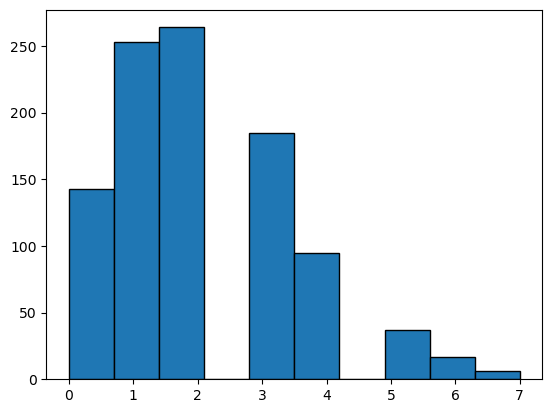

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

lambda_val = 20
p_val = 0.1
num_draws = 1000

k_sims = []

for i in range(num_draws):
    n_sample = np.random.poisson(lam=lambda_val)
    k_sample = np.random.binomial(n=n_sample, p=p_val)
    k_sims.append(k_sample)

k_sims = pd.Series(k_sims)

freq_counts = k_sims.value_counts()
freq_table = freq_counts.reset_index()
freq_table.columns = ["K Value", "Freq"]
freq_table = freq_table.sort_values(by="K Value")

plt.hist(k_sims, edgecolor="black")
print(freq_table)

## 2. Tulips

You are working with a tulip farmer to improve the color of a new variety of blue tulip.
After many measurements, in which you've summarized the color of each tulip flower by a single wavelength,
you've determined that
- color values range from about 450-500nm (possibly with occasional tulips outside this range)
- the average tulip color is fairly blue: about 475nm
- the standard deviation of color across flowers from a single plant tends to be around 5nm
- however, some tulip plants produce more variable colors than others: most plants have standard deviations below 10nm,
  but some (roughly 10%) have larger standard deviations.

**(a)** Develop a model for $C$, the color value (measured as wavelengths, in nm) of a randomly chosen tulip in the field,
using at least two different distributions, formulated as in the last question.
Make sure all parameters are specified, and explain your choice of distributions.

**(b)** Simulate 100 tulip colors, and verify that the resulting values agree with the verbal description above.
You do not have to explicitly simulate the separate plants (i.e., you may assume that each flower comes from a separate plant).

### My Solution

*(a)*:

First: plant determines variability

SD: Standard Deviation: Bernoulli(p)
- 90% of plants have SD around 5nm and below 10nm
    - choose SD = 5 nm
- other 10% have higher SD than 10nm
    - choose SD = 15nm

$$
P(SD=s) = 
\begin{cases} 
  0.9 & \text{if } s=5 \\
  0.1 & \text{if } s=15 
\end{cases}
$$

Second: flower's color varies around plant's average

Normal Distribution: normal($\mu$, $\sigma$)
- mean color ($\mu$) is 475 nm
- SD is value determined from above

$$
X \sim \mathcal{N}(475, SD) \quad
$$


(array([ 4.,  8., 18., 31., 22., 10.,  5.,  0.,  1.,  1.]),
 array([460.00183846, 463.87266192, 467.74348539, 471.61430885,
        475.48513232, 479.35595578, 483.22677924, 487.09760271,
        490.96842617, 494.83924964, 498.7100731 ]),
 <BarContainer object of 10 artists>)

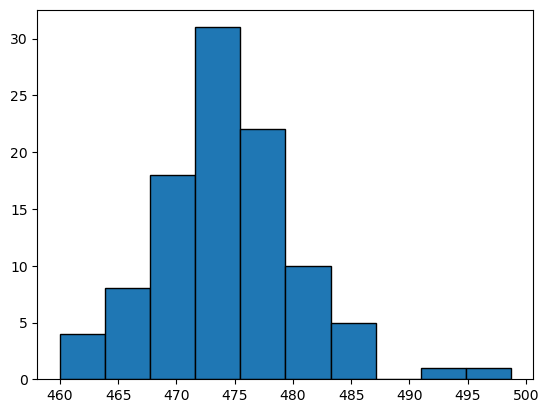

In [15]:
mu = 475
std_dev = [5,15]
prob_values = [0.9,0.1]
num_tulips = 100

colors_sim = []

for i in range(num_tulips):
    s = np.random.choice(std_dev, p=prob_values)
    color = np.random.normal(loc=mu, scale=s)
    colors_sim.append(color)

colors_sim = np.array(colors_sim)

plt.hist(colors_sim, edgecolor="black")
    

## 3. Your stochastic day

Give examples from your day of quantities that might be reasonably modeled as random draws from the following distributions:

**(a)** Binomial
**(b)** Normal
**(c)** Poisson
**(d)** Exponential

In each case, give example parameter values (i.e., for (a), say what $n$ and $p$ are in your example).

*Example:* Every day I tie my shoes twice. Each time, there is a probability of about 5% that I'll need to untie them to adjust.
The number of times I don't tie a shoe correctly on the first time in a day is Binomial($n=4$, $p=0.05$). (It is $n=4$ for two shoes, two times.)

*Example:* My eight-year-old-kid sometimes takes a loooong time to put on *her* shoes (indeed, seemingly unboundedly long), but is more often quick.
The time she takes to put on her shoes in the morning is perhaps Exponential with a mean of 2 minutes.

### My Solution

*(a)*: Binomial Distribution: Binomial(n,p)

I have my top 5 places on campus to study and there is a 40% chance that I see a friend at that study spot as well. This means that n = 5 and p = 0.4. There are only 1-5 options of spots to study and a fixed probability of seeing a friend at each one.

*(b)*: Normal Distribution: Normal($\mu$, $\sigma$)

My walk to the EMU everyday has a normal distribution. It tends to be around the same central value of 12 minutes, but same days it can vary by 1 minute intervals.

In this case, $\mu$ = 12 minutes and $\sigma$ = 1 minute (standard deviation)

*(c)*: Poisson Distribution: Poisson($\lambda$)

Throughout all the steps that I take in a day, I stumble a certain amount of times every hour. In this case, $\lambda$ = 2 which is my average rate of stumbling per hour.

*(d)*: Exponential Distribution: 

After I finish a task at work, there is a certain amount of time that passes before my boss assigns me a new task. These assignments seem to be random, but the rate of assignments is $\lambda$ = 0.5. This means there are an average of 0.5 requests per hour.

In this case, the mean waiting time is 1/$\lambda$ = 2 hours.


## 4. Integrals

Suppose that the amount of time it takes me to write a page of text is $R$ minutes,
and I will make $X$ errors during that time.
Suppose that $R$ is [Gamma distributed](https://en.wikipedia.org/wiki/Gamma_distribution) with shape $\alpha=5$ and scale $\theta=4$.
Also, I make more errors the longer I type: the number of errors is Poisson, with mean $R/5$.
In symbols:
$$\begin{aligned}
\text{total time: } R &\sim \text{Gamma}(\text{scale}=4, \text{shape}=5) \\
\text{number of errors: } X &\sim \text{Poisson}(\text{mean}=R/5) .
\end{aligned}$$

**(a)** Suppose that for a given page I took $r$ minutes (i.e., I had $R=r$).
What is the probability that I made no errors? Write down the expression, and evaluate it for $r=20$.

**(b)** Now, what is the probability I made no errors on a randomly chosen page?
To do this, write down the integral which averages your expression for (a) over possible values of $R$.

**(c)** Now use software (for instance, [`np.trapezoid()`](https://numpy.org/devdocs/reference/generated/numpy.trapezoid.html), or some symbolic algebra software that can "do" integrals) to find a value for the integral. *Note: you could use [`scipy.stats.gamma.pdf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html) for the probability density function of the Gamma distribution.*

**(d)** Check your answer to (b) by simulating at least 10000 draws from the distribution.

### My Solution

Moved to next HW